In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load first txt file
df_demo = pd.read_csv("df_final_demo.txt")

# View structure
df_demo.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load first txt file
df_clients = pd.read_csv("df_final_experiment_clients.txt")

# View structure
df_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [3]:

# 1. Lowercase the column names
df_clients.columns = df_clients.columns.str.lower()

# 2. Lowercase all string/text values
df_clients['variation'] = df_clients['variation'].str.lower()

df_clients

,client_id,variation
0,9988021,test
1,8320017,test
2,4033851,control
3,1982004,test
4,9294070,control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [4]:
# Count NaNs in the 'variation' column
nan_count = df_clients['variation'].isna().sum()

print(f"Number of NaNs in 'variation' column: {nan_count}")

Number of NaNs in 'variation' column: 20109


In [5]:
# Merge on client_id
df_demo = df_demo.merge(df_clients, on='client_id', how='left')

df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [6]:
# Group and count
df_demo.groupby('client_id')['variation'].nunique().value_counts()

variation
1    50500
0    20109
Name: count, dtype: int64

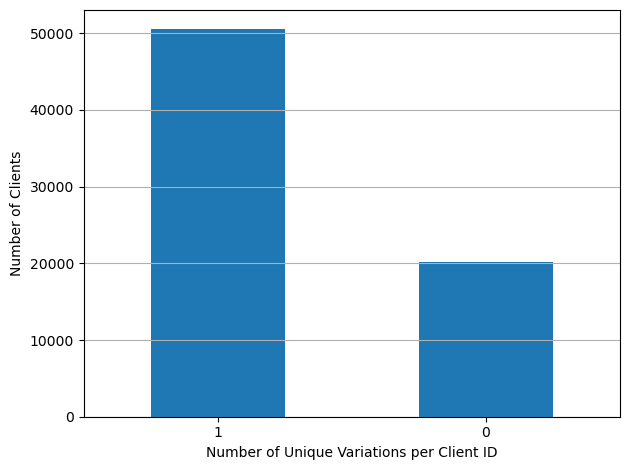

In [7]:
import matplotlib.pyplot as plt

variation_counts = df_demo.groupby('client_id')['variation'].nunique().value_counts()

# Plot
variation_counts.plot(kind='bar')

# Labels and title
plt.xlabel('Number of Unique Variations per Client ID')
plt.ylabel('Number of Clients')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [8]:
df_demo.groupby('client_id')['gendr'].nunique().value_counts()


gendr
1    70595
0       14
Name: count, dtype: int64

gendr
U    34.17
M    33.61
F    32.22
X     0.00
Name: count, dtype: float64


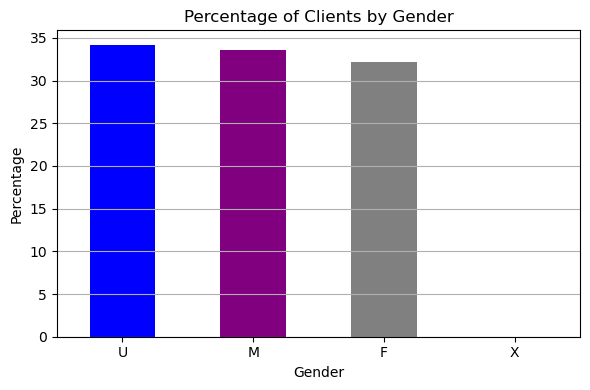

In [9]:
# Count clients per gender
gender_counts = df_demo['gendr'].value_counts()
#Percentage
gender_percentages = (gender_counts / gender_counts.sum()) * 100
#print
print(gender_percentages.round(2))


# Bar Chart
plt.figure(figsize=(6, 4))
gender_percentages.plot(kind='bar', color=['blue', 'purple', 'gray'])
plt.title('Percentage of Clients by Gender')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load third txt file
df_web1 = pd.read_csv("df_final_web_data_pt_1.txt")

# View structure
df_web1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load third txt file
df_web2 = pd.read_csv("df_final_web_data_pt_2.txt")

# View structure
df_web2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [12]:
# Merging two last data frames
merged_df = pd.merge(df_web1, df_web2, on=['client_id','visitor_id' ,'visit_id','process_step','date_time'],how='outer')  # or 'left', 'right', 'outer'
merged_df.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09
1,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36
2,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45
3,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31
4,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05


In [13]:
merged_df

,client_id,visitor_id,visit_id,process_step,date_time
0,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09
1,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36
2,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45
3,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31
4,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05
...,...,...,...,...,...
755400,9999875,738878760_1556639849,931268933_219402947_599432,start,2017-06-01 22:40:01
755401,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:40:08
755402,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28
755403,9999875,738878760_1556639849,931268933_219402947_599432,step_2,2017-06-01 22:41:47


In [ ]:
# Load combined file (all)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_combined = pd.read_csv("df_full.csv")

df_combined

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,visitor_id,visit_id,process_step,date_time
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321190,6334360,Test,4.0,53.0,66.5,U,2.0,93103.47,6.0,9.0,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:45:38
321191,6334360,Test,4.0,53.0,66.5,U,2.0,93103.47,6.0,9.0,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:44:43
321192,6334360,Test,4.0,53.0,66.5,U,2.0,93103.47,6.0,9.0,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:44:30
321193,6334360,Test,4.0,53.0,66.5,U,2.0,93103.47,6.0,9.0,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:42:36


In [39]:
# Lowercase the column names
df_combined.columns = df_combined.columns.str.lower()

In [ ]:
# Total unique users per group
total_users = df_combined.groupby('variation')['client_id'].nunique()

# Users who reached the 'confirm' step
confirm_users = df_combined[df_combined['process_step'] == 'confirm'].groupby('variation')['client_id'].nunique()

# Calculate conversion rate
conversion_rate = (confirm_users / total_users).fillna(0)

# Display as percentage
conversion_rate_percentage = (conversion_rate * 100).round(2)
print(conversion_rate_percentage)

#The control group has a 65,58% completion rate, and the test has 69,29%, that’s a +3,71% improvement

variation
Control    65.58
Test       69.29
Name: client_id, dtype: float64


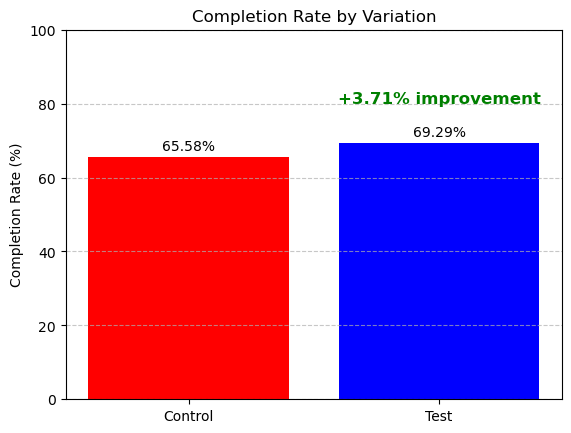

In [62]:
#Completion Rate by Complation(Control, Test)

import matplotlib.pyplot as plt

# Sample data
conversion_rate_percentage = {
    'Control': 65.58,
    'Test': 69.29
}

# Extract values
groups = list(conversion_rate_percentage.keys())
rates = list(conversion_rate_percentage.values())

# Bar chart
colors = ['red', 'blue']
plt.bar(groups, rates, color=colors)

# Add text labels on top of each bar
for i, rate in enumerate(rates):
    plt.text(i, rate + 1, f"{rate}%", ha='center', va='bottom', fontsize=10)

# Calculate and add uplift annotation
uplift = round(rates[1] - rates[0], 2)
plt.text(1, rates[1] + 10, f"+{uplift}% improvement", 
         ha='center', va='bottom', fontsize=12, color='green', fontweight='bold')

# Chart formatting
plt.ylabel("Completion Rate (%)")
plt.title("Completion Rate by Variation")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [ ]:
#Average Time Spent per Step(Seconds)

# Ensure date_time is datetime type
df_combined['date_time'] = pd.to_datetime(df_combined['date_time'])

# Sort by visit_id and date_time
df_sorted = df_combined.sort_values(['visit_id', 'date_time'])

# Calculate time difference between consecutive steps per visit
df_sorted['time_diff'] = df_sorted.groupby('visit_id')['date_time'].diff().shift(-1)

# 'time_diff' now represents time spent on the current step until the next step
# Convert to seconds or minutes
df_sorted['time_spent_sec'] = df_sorted['time_diff'].dt.total_seconds()

# Remove rows with NaN time_diff (last step per visit)
df_filtered = df_sorted.dropna(subset=['time_spent_sec'])

# Calculate average time spent on each step by variation
avg_time_spent = df_filtered.groupby(['variation', 'process_step'])['time_spent_sec'].mean().reset_index()

# Optional: convert seconds to minutes
avg_time_spent['time_spent_min'] = avg_time_spent['time_spent_sec'] / 60

print(avg_time_spent)

  variation process_step  time_spent_sec  time_spent_min
0   Control      confirm      164.092802        2.734880
1   Control        start       62.896677        1.048278
2   Control       step_1       50.305041        0.838417
3   Control       step_2       91.626863        1.527114
4   Control       step_3      135.444563        2.257409
5      Test      confirm      243.120249        4.052004
6      Test        start       60.557650        1.009294
7      Test       step_1       60.580369        1.009673
8      Test       step_2       88.614202        1.476903
9      Test       step_3      128.937401        2.148957


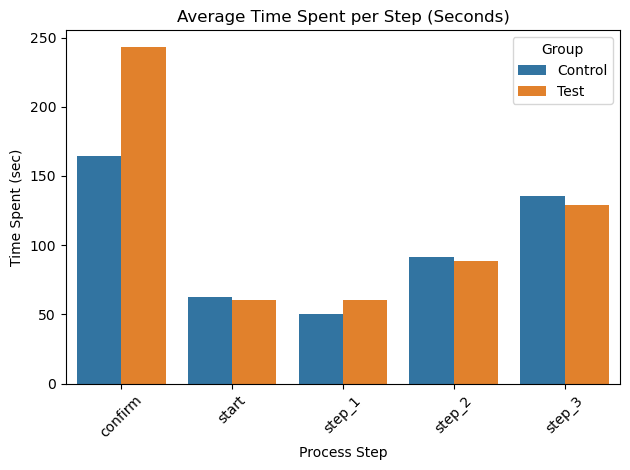

In [ ]:
#Average Time Spent per Step(Seconds)

import seaborn as sns
import matplotlib.pyplot as plt


sns.barplot(data=avg_time_spent, x='process_step', y='time_spent_sec', hue='variation')
plt.title('Average Time Spent per Step (Seconds)')
plt.ylabel('Time Spent (sec)')
plt.xlabel('Process Step')
plt.xticks(rotation=45)
plt.legend(title='Group')
plt.tight_layout()
plt.show()

/var/folders/9h/47m7r7s90_g8yb96thpzxb0h0000gn/T/ipykernel_53911/2848625698.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=error_rate, x='variation', y='error_rate_pct', palette='pastel')


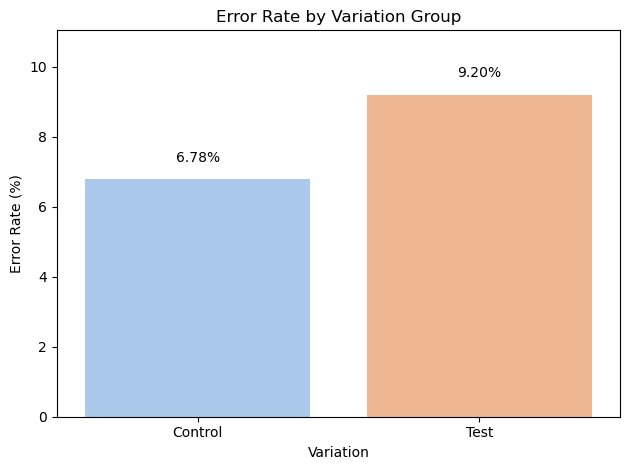

In [ ]:
# Error Rate KPI Calculation Plan

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assign numeric order to steps
step_order = {
    'start': 0,
    'step_1': 1,
    'step_2': 2,
    'step_3': 3,
    'confirm': 4
}
df['step_num'] = df['process_step'].map(step_order)

# Sort and calculate backward steps
df = df.sort_values(['visit_id', 'date_time'])
df['prev_step_num'] = df.groupby('visit_id')['step_num'].shift(1)
df['is_backward'] = df['step_num'] < df['prev_step_num']

# Compute error rate
error_counts = df.groupby('variation')['is_backward'].sum()
total_steps = df.groupby('variation')['step_num'].count()
error_rate = (error_counts / total_steps).reset_index()
error_rate.columns = ['variation', 'error_rate']
error_rate['error_rate_pct'] = error_rate['error_rate'] * 100

# Plot bar chart
sns.barplot(data=error_rate, x='variation', y='error_rate_pct', palette='pastel')
plt.title('Error Rate by Variation Group')
plt.ylabel('Error Rate (%)')
plt.xlabel('Variation')
plt.ylim(0, error_rate['error_rate_pct'].max() * 1.2)  # some headroom
for i, row in error_rate.iterrows():
    plt.text(i, row['error_rate_pct'] + 0.5, f"{row['error_rate_pct']:.2f}%", ha='center')
plt.tight_layout()
plt.show()


In [ ]:
# User-Level Error Rate Calculation Breakdown


# Identify which visits had at least one backward step
backward_visits = df[df['is_backward'] == True][['visit_id', 'client_id', 'variation']].drop_duplicates()

# Count how many **unique users** had at least one backward step, grouped by variation
user_backward_counts = backward_visits.groupby('variation')['client_id'].nunique().reset_index()
user_backward_counts.columns = ['variation', 'users_with_backwards']

# Count total users per group
total_users = df.groupby('variation')['client_id'].nunique().reset_index()
total_users.columns = ['variation', 'total_users']

# Merge and calculate user-level error rate
user_error_rate = pd.merge(user_backward_counts, total_users, on='variation')
user_error_rate['user_error_rate_pct'] = (user_error_rate['users_with_backwards'] / user_error_rate['total_users']) * 100

print(user_error_rate)


  variation  users_with_backwards  total_users  user_error_rate_pct
0   Control                  6254        23526            26.583355
1      Test                  9096        26961            33.737621


/var/folders/9h/47m7r7s90_g8yb96thpzxb0h0000gn/T/ipykernel_53911/3494194216.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=user_error_rate, x='variation', y='user_error_rate_pct', palette='pastel')


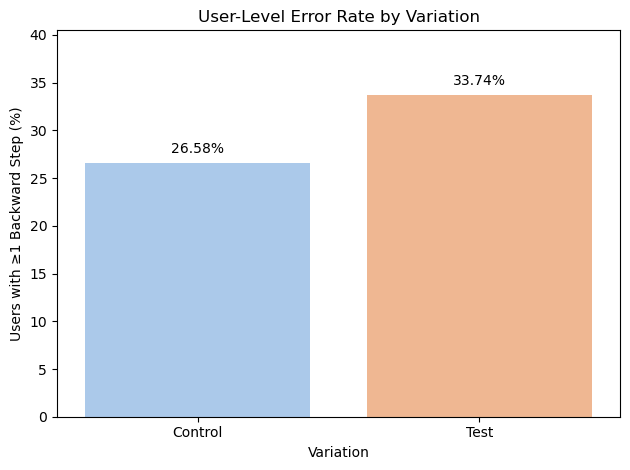

In [68]:
sns.barplot(data=user_error_rate, x='variation', y='user_error_rate_pct', palette='pastel')
plt.title('User-Level Error Rate by Variation')
plt.ylabel('Users with ≥1 Backward Step (%)')
plt.xlabel('Variation')
for i, row in user_error_rate.iterrows():
    plt.text(i, row['user_error_rate_pct'] + 1, f"{row['user_error_rate_pct']:.2f}%", ha='center')
plt.ylim(0, user_error_rate['user_error_rate_pct'].max() * 1.2)
plt.tight_layout()
plt.show()


In [70]:
# Sort again to make sure transitions are in order
df = df.sort_values(['visit_id', 'date_time'])

# Get previous step info
df['prev_step'] = df.groupby('visit_id')['process_step'].shift(1)
df['prev_step_num'] = df.groupby('visit_id')['step_num'].shift(1)

# Filter only backward transitions
backward_transitions = df[df['step_num'] < df['prev_step_num']].copy()
backward_transitions['transition'] = backward_transitions['prev_step'] + ' → ' + backward_transitions['process_step']

transition_counts = backward_transitions['transition'].value_counts().reset_index()
transition_counts.columns = ['transition', 'count']


transition_counts_by_group = backward_transitions.groupby(['variation', 'transition']).size().reset_index(name='count')

transition_counts_by_group

,variation,transition,count
0,Control,confirm → start,592
1,Control,confirm → step_1,98
2,Control,confirm → step_3,130
3,Control,step_1 → start,2494
4,Control,step_2 → start,775
5,Control,step_2 → step_1,1391
6,Control,step_3 → start,1067
7,Control,step_3 → step_1,815
8,Control,step_3 → step_2,2367
9,Test,confirm → start,334


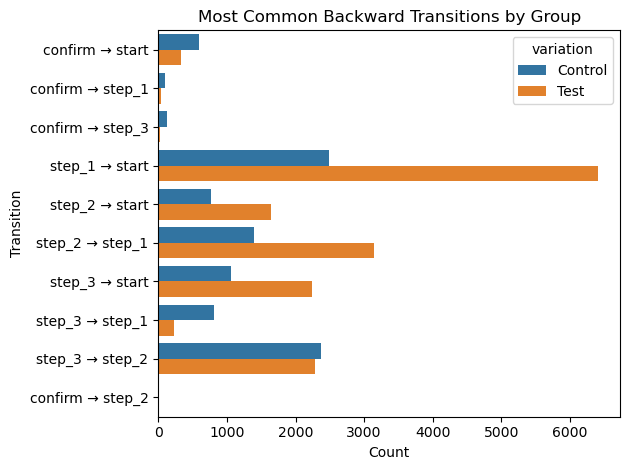

In [71]:
sns.barplot(data=transition_counts_by_group, x='count', y='transition', hue='variation')
plt.title('Most Common Backward Transitions by Group')
plt.xlabel('Count')
plt.ylabel('Transition')
plt.tight_layout()
plt.show()


In [ ]:
df_clients

In [ ]:
# Suppose this is another DataFrame with age info
df_clients = pd.DataFrame({
    'client_id': [101, 102, 103, 104],
    'Variation': [25, 30, 22, 28]
})

# Merge on client_id
df = df.merge(age_df, on='client_id', how='left'